In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def predict(w, X):
    '''
    predict label of each row of X, given w 
    X: a 2-d numpy array of shape (N, d), each row is a datapoint 
    w_init: a 1-d numpy array of shape (d)
    '''
    return np.sign(X.dot(w))

def perceptron(X, y, w_init):
    '''
    perform perceptron learning algorithm
    X: a 2-d numpy array of shape (N, d), each row is a datapoint 
    y: a 1-d numpy array of shape (N), label of each row of X. y[i] = 1/-1
    w_init: a 1-d numpy array of shape (d)
    '''
    w = w_init
    while True:
        pred = predict(w, X)
        # find indexes of misclassified points
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # number of misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return w
        # random pick one misclassified point
        random_id = np.random.choice(mis_idxs, 1)[0]
        # update w
        w = w + y[random_id]*X[random_id]

In [35]:
means = [[-1,0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N=10

np.random.seed(2)
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))

np.random.seed(73)
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis=1)
w_init = np.random.randn(Xbar.shape[1])

In [36]:
w = perceptron(Xbar, y, w_init)

In [37]:
print(w)

[ 0.57681305 -2.52654515  1.61348129]


## visualize

In [38]:
def viperceptron(X, y, w_init):
    w = w_init
    w_hist = [w]
    mis_points = []
    while True:
        pred = predict(w, X)
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return (w_hist, mis_points)
        random_id = np.random.choice(mis_idxs, 1)[0]
        mis_points.append(random_id)
        w = w + y[random_id]*X[random_id]
        w_hist.append(w)

In [39]:
for i in range(100):
    np.random.seed(i)

    # Xbar
    w_init = np.random.randn(Xbar.shape[1])
    w_hist, m = viperceptron(Xbar, y, w_init)

    print(i, len(w_hist))

0 4
1 2
2 6
3 4
4 5
5 4
6 3
7 6
8 12
9 3
10 5
11 4
12 5
13 6
14 8
15 4
16 8
17 1
18 9
19 3
20 6
21 3
22 1
23 6
24 2
25 9
26 1
27 2
28 7
29 4
30 7
31 4
32 10
33 4
34 5
35 5
36 7
37 3
38 4
39 4
40 4
41 5
42 3
43 5
44 4
45 6
46 7
47 4
48 5
49 4
50 3
51 3
52 1
53 8
54 3
55 7
56 4
57 5
58 4
59 9
60 4
61 3
62 4
63 10
64 1
65 9
66 2
67 4
68 6
69 2
70 5
71 4
72 8
73 7
74 5
75 2
76 5
77 5
78 5
79 4
80 3
81 5
82 2
83 2
84 4
85 5
86 4
87 5
88 8
89 3
90 8
91 4
92 3
93 8
94 5
95 4
96 5
97 3
98 3
99 8


In [40]:
i = 73
np.random.seed(i)
w_init = np.random.randn(Xbar.shape[1])
w_hist, m = viperceptron(Xbar, y, w_init)

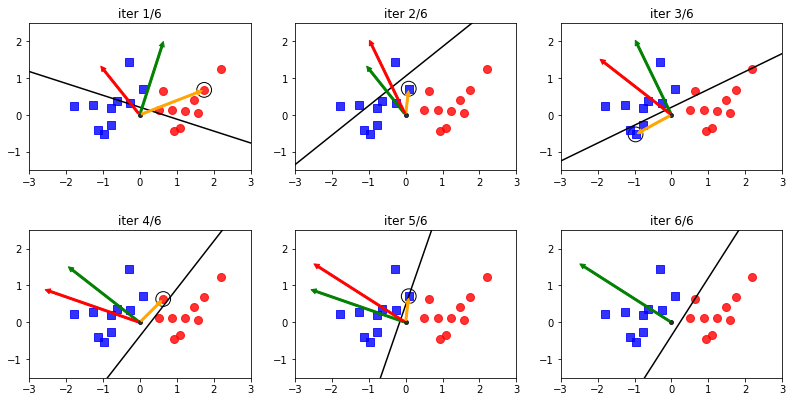

In [41]:
def draw_line(plt, w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')


nrows = 2
ncols = 3
width = 4.5*ncols
height = 3.5*nrows

filename = 'pla_visualize1.png'
plt.close('all')
fig, axs = plt.subplots(nrows, ncols, figsize=(width, height))
ids = range(7)

for i, k in enumerate(ids[1:]):
    r = i//ncols
    c = i % ncols
    str0 = 'iter {}/{}'.format(i+1, len(ids)-1)
    # if nrows > 1:
    axs[r, c].set_title(str0)
    axs[r, c].plot(X1[:, 0], X1[:, 1], 'bs', markersize=8, alpha=.8)
    axs[r, c].plot(X2[:, 0], X2[:, 1], 'ro', markersize=8, alpha=.8)
    axs[r, c].plot(0, 0, 'k.', markersize=8, alpha=.8)
    axs[r, c].axis([0, 6, -2, 4])
    draw_line(axs[r, c], w_hist[k])
    wx, wy = w_hist[k][1], w_hist[k][2]
    axs[r, c].annotate('', xy=(wx, wy), xytext=(0, 0),
                       arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec='green', fc='green'))
    if k < nrows*ncols:
        xmis = X[m[k], 0]
        ymis = X[m[k], 1]
        # circle around the misclassified point
        circle = plt.Circle((xmis, ymis), 0.2, color='k', fill=False)
        axs[r, c].add_artist(circle)
        # vector to xmis
        axs[r, c].annotate('', xy=(xmis, ymis), xytext=(0, 0),
                           arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec='orange', fc='orange'))

        if m[k] > 10:
            # New w if the misclassified point is in red
            axs[r, c].annotate('', xytext=(0, 0), xy=(wx - xmis, wy-ymis),
                               arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec='red', fc='red'))
            # axs[r, c].annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            #     arrowprops=dict(facecolor='black', shrink=0.01, ''),
            #         )
        else:  # the misclassified point is in blue
            axs[r, c].annotate('', xytext=(0, 0), xy=(wx + xmis, wy+ymis),
                               arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec='red', fc='red'))

    axs[r, c].axis('scaled')
    axs[r, c].axis([-3, 3, -1.5, 2.5])
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.show()
